In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from collections import defaultdict
import re
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
from nltk import *
# from plotly import express as px
%matplotlib inline

In [3]:
df = pd.read_csv('/MLAI/MLMAJOR/kaggle/Intern/Neurabrain/Whatsapp/Whatsappedited.csv')
df.head()

,Data,Date,Time,Person,Message
0,"16/08/18, 20:11 - Chinmayee created group ""AGI...",16/08/18,20:11,"Chinmayee created group ""AGI OFFICIAL@IT 2018",
1,"16/08/18, 20:11 - Chinmayee added you",16/08/18,20:11,Chinmayee added you,
2,"16/08/18, 20:12 - Chinmayee: Hello this is off...",16/08/18,20:12,Chinmayee,Hello this is official grup
3,"16/08/18, 20:12 - Jagas: Chusinam leaaa",16/08/18,20:12,Jagas,Chusinam leaaa
4,"16/08/18, 20:12 - +91 6309 604 570: Admin cheyyi",16/08/18,20:12,+91 6309 604 570,Admin cheyyi


In [4]:
print(len(df['Date'][0]))

8


In [5]:
dates = list(df['Date'])
dates = [str(i) for i in dates]
dates_map = {i+1:dates[i] for i in range(len(dates))}
dates_map

{1: '16/08/18',
 2: '16/08/18',
 3: '16/08/18',
 4: '16/08/18',
 5: '16/08/18',
 6: '16/08/18',
 7: '16/08/18',
 8: '16/08/18',
 9: '16/08/18',
 10: '16/08/18',
 11: '16/08/18',
 12: '16/08/18',
 13: '16/08/18',
 14: '16/08/18',
 15: '16/08/18',
 16: '16/08/18',
 17: '16/08/18',
 18: '16/08/18',
 19: '16/08/18',
 20: '16/08/18',
 21: '16/08/18',
 22: '16/08/18',
 23: '17/08/18',
 24: '17/08/18',
 25: '17/08/18',
 26: '17/08/18',
 27: '17/08/18',
 28: '17/08/18',
 29: '17/08/18',
 30: '17/08/18',
 31: '17/08/18',
 32: '17/08/18',
 33: '17/08/18',
 34: '17/08/18',
 35: '17/08/18',
 36: '17/08/18',
 37: '17/08/18',
 38: '17/08/18',
 39: '17/08/18',
 40: '17/08/18',
 41: '17/08/18',
 42: '17/08/18',
 43: '17/08/18',
 44: '17/08/18',
 45: '17/08/18',
 46: '17/08/18',
 47: '17/08/18',
 48: '17/08/18',
 49: '17/08/18',
 50: '17/08/18',
 51: '17/08/18',
 52: '17/08/18',
 53: '17/08/18',
 54: '17/08/18',
 55: '17/08/18',
 56: '17/08/18',
 57: '17/08/18',
 58: '17/08/18',
 59: '17/08/18',
 60: '

In [6]:
tousedates = [dates[i] for i in range(len(dates)) if re.search(r'\d{2}/\d{2}/\d{2}',dates[i])]
tousedates

['16/08/18',
 '16/08/18',
 '16/08/18',
 '16/08/18',
 '16/08/18',
 '16/08/18',
 '16/08/18',
 '16/08/18',
 '16/08/18',
 '16/08/18',
 '16/08/18',
 '16/08/18',
 '16/08/18',
 '16/08/18',
 '16/08/18',
 '16/08/18',
 '16/08/18',
 '16/08/18',
 '16/08/18',
 '16/08/18',
 '16/08/18',
 '16/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',
 '17/08/18',

In [7]:
print(len(tousedates))

7647


In [8]:
match = re.search(r'\d{2}/\d{2}/\d{2}', 'Rock d dance floor..')
match

In [9]:
usemap = {}
for key,value in dates_map.items():
    if re.search(r'\d{2}/\d{2}/\d{2}',value):
        usemap[key] = value
        
    else:
        usemap[key] = 0
        
usemap

{1: '16/08/18',
 2: '16/08/18',
 3: '16/08/18',
 4: '16/08/18',
 5: '16/08/18',
 6: '16/08/18',
 7: '16/08/18',
 8: '16/08/18',
 9: '16/08/18',
 10: '16/08/18',
 11: '16/08/18',
 12: '16/08/18',
 13: '16/08/18',
 14: '16/08/18',
 15: '16/08/18',
 16: '16/08/18',
 17: '16/08/18',
 18: '16/08/18',
 19: '16/08/18',
 20: '16/08/18',
 21: '16/08/18',
 22: '16/08/18',
 23: '17/08/18',
 24: '17/08/18',
 25: '17/08/18',
 26: '17/08/18',
 27: '17/08/18',
 28: '17/08/18',
 29: '17/08/18',
 30: '17/08/18',
 31: '17/08/18',
 32: '17/08/18',
 33: '17/08/18',
 34: '17/08/18',
 35: '17/08/18',
 36: '17/08/18',
 37: '17/08/18',
 38: '17/08/18',
 39: '17/08/18',
 40: '17/08/18',
 41: '17/08/18',
 42: '17/08/18',
 43: '17/08/18',
 44: '17/08/18',
 45: '17/08/18',
 46: '17/08/18',
 47: '17/08/18',
 48: '17/08/18',
 49: '17/08/18',
 50: '17/08/18',
 51: '17/08/18',
 52: '17/08/18',
 53: '17/08/18',
 54: '17/08/18',
 55: '17/08/18',
 56: '17/08/18',
 57: '17/08/18',
 58: '17/08/18',
 59: '17/08/18',
 60: '

In [10]:
df['Dates'] = np.array(list(usemap.values()))
df.head()

,Data,Date,Time,Person,Message,Dates
0,"16/08/18, 20:11 - Chinmayee created group ""AGI...",16/08/18,20:11,"Chinmayee created group ""AGI OFFICIAL@IT 2018",,16/08/18
1,"16/08/18, 20:11 - Chinmayee added you",16/08/18,20:11,Chinmayee added you,,16/08/18
2,"16/08/18, 20:12 - Chinmayee: Hello this is off...",16/08/18,20:12,Chinmayee,Hello this is official grup,16/08/18
3,"16/08/18, 20:12 - Jagas: Chusinam leaaa",16/08/18,20:12,Jagas,Chusinam leaaa,16/08/18
4,"16/08/18, 20:12 - +91 6309 604 570: Admin cheyyi",16/08/18,20:12,+91 6309 604 570,Admin cheyyi,16/08/18


In [11]:
df.shape

(14965, 6)

In [12]:
touse = df[df['Dates']!='0']
touse.shape

(7647, 6)

In [13]:
latdate = list(touse['Dates'])
latmap = {i+1:latdate[i] for i in range(len(latdate))}
finaluse = {}
for key,value in latmap.items():
    if len(value)>10:
        finaluse[key] = 0

    else:
        finaluse[key] = value
        
touse['Dates'] = np.array(list(finaluse.values()))
touse['Dates'].unique()

<ipython-input-13-d62a1344109c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  touse['Dates'] = np.array(list(finaluse.values()))


array(['16/08/18', '17/08/18', '18/08/18', '19/08/18', '20/08/18',
       '21/08/18', '22/08/18', '23/08/18', '24/08/18', '25/08/18',
       '26/08/18', '27/08/18', '28/08/18', '29/08/18', '30/08/18',
       '31/08/18', '01/09/18', '02/09/18', '03/09/18', '04/09/18',
       '05/09/18', '06/09/18', '07/09/18', '08/09/18', '09/09/18',
       '10/09/18', '11/09/18', '12/09/18', '13/09/18', '14/09/18',
       '15/09/18', '16/09/18', '17/09/18', '18/09/18', '19/09/18',
       '20/09/18', '21/09/18', '22/09/18', '23/09/18', '24/09/18',
       '25/09/18', '27/09/18', '28/09/18', '30/09/18', '01/10/18',
       '02/10/18', '03/10/18', '04/10/18', '05/10/18', '07/10/18',
       '08/10/18', '09/10/18', '10/10/18', '11/10/18', '13/10/18',
       '14/10/18', '15/10/18', '17/10/18', '18/10/18', '19/10/18',
       '22/10/18', '23/10/18', '24/10/18', '25/10/18', '27/10/18',
       '28/10/18', '29/10/18', '30/10/18', '01/11/18', '02/11/18',
       '03/11/18', '04/11/18', '05/11/18', '06/11/18', '07/11/

In [14]:
touse = touse[touse['Dates']!='0']
touse.shape

(7636, 6)

In [15]:
touse['Dates'].unique()

array(['16/08/18', '17/08/18', '18/08/18', '19/08/18', '20/08/18',
       '21/08/18', '22/08/18', '23/08/18', '24/08/18', '25/08/18',
       '26/08/18', '27/08/18', '28/08/18', '29/08/18', '30/08/18',
       '31/08/18', '01/09/18', '02/09/18', '03/09/18', '04/09/18',
       '05/09/18', '06/09/18', '07/09/18', '08/09/18', '09/09/18',
       '10/09/18', '11/09/18', '12/09/18', '13/09/18', '14/09/18',
       '15/09/18', '16/09/18', '17/09/18', '18/09/18', '19/09/18',
       '20/09/18', '21/09/18', '22/09/18', '23/09/18', '24/09/18',
       '25/09/18', '27/09/18', '28/09/18', '30/09/18', '01/10/18',
       '02/10/18', '03/10/18', '04/10/18', '05/10/18', '07/10/18',
       '08/10/18', '09/10/18', '10/10/18', '11/10/18', '13/10/18',
       '14/10/18', '15/10/18', '17/10/18', '18/10/18', '19/10/18',
       '22/10/18', '23/10/18', '24/10/18', '25/10/18', '27/10/18',
       '28/10/18', '29/10/18', '30/10/18', '01/11/18', '02/11/18',
       '03/11/18', '04/11/18', '05/11/18', '06/11/18', '07/11/

In [16]:
touse['Dates'] = pd.to_datetime(touse['Dates'])

In [17]:
touse = touse.drop(['Date'],axis = 1)
touse.head()

,Data,Time,Person,Message,Dates
0,"16/08/18, 20:11 - Chinmayee created group ""AGI...",20:11,"Chinmayee created group ""AGI OFFICIAL@IT 2018",,2018-08-16
1,"16/08/18, 20:11 - Chinmayee added you",20:11,Chinmayee added you,,2018-08-16
2,"16/08/18, 20:12 - Chinmayee: Hello this is off...",20:12,Chinmayee,Hello this is official grup,2018-08-16
3,"16/08/18, 20:12 - Jagas: Chusinam leaaa",20:12,Jagas,Chusinam leaaa,2018-08-16
4,"16/08/18, 20:12 - +91 6309 604 570: Admin cheyyi",20:12,+91 6309 604 570,Admin cheyyi,2018-08-16


In [18]:
weeks = {
0 : 'Monday',
1 : 'Tuesday',
2 : 'Wednesday',
3 : 'Thrusday',
4 : 'Friday',
5 : 'Saturday',
6 : 'Sunday'
}
touse['Day'] = touse['Dates'].dt.weekday.map(weeks)
touse.head()

,Data,Time,Person,Message,Dates,Day
0,"16/08/18, 20:11 - Chinmayee created group ""AGI...",20:11,"Chinmayee created group ""AGI OFFICIAL@IT 2018",,2018-08-16,Thrusday
1,"16/08/18, 20:11 - Chinmayee added you",20:11,Chinmayee added you,,2018-08-16,Thrusday
2,"16/08/18, 20:12 - Chinmayee: Hello this is off...",20:12,Chinmayee,Hello this is official grup,2018-08-16,Thrusday
3,"16/08/18, 20:12 - Jagas: Chusinam leaaa",20:12,Jagas,Chusinam leaaa,2018-08-16,Thrusday
4,"16/08/18, 20:12 - +91 6309 604 570: Admin cheyyi",20:12,+91 6309 604 570,Admin cheyyi,2018-08-16,Thrusday


In [19]:
touse.columns

Index(['Data', 'Time', 'Person', 'Message', 'Dates', 'Day'], dtype='object')

In [20]:
touse = touse[['Dates','Day','Time','Message','Person','Data']]
touse.head()

,Dates,Day,Time,Message,Person,Data
0,2018-08-16,Thrusday,20:11,,"Chinmayee created group ""AGI OFFICIAL@IT 2018","16/08/18, 20:11 - Chinmayee created group ""AGI..."
1,2018-08-16,Thrusday,20:11,,Chinmayee added you,"16/08/18, 20:11 - Chinmayee added you"
2,2018-08-16,Thrusday,20:12,Hello this is official grup,Chinmayee,"16/08/18, 20:12 - Chinmayee: Hello this is off..."
3,2018-08-16,Thrusday,20:12,Chusinam leaaa,Jagas,"16/08/18, 20:12 - Jagas: Chusinam leaaa"
4,2018-08-16,Thrusday,20:12,Admin cheyyi,+91 6309 604 570,"16/08/18, 20:12 - +91 6309 604 570: Admin cheyyi"


In [21]:
touse['Letters'] = touse['Message'].apply(lambda s:len(s))
touse.head(2)

,Dates,Day,Time,Message,Person,Data,Letters
0,2018-08-16,Thrusday,20:11,,"Chinmayee created group ""AGI OFFICIAL@IT 2018","16/08/18, 20:11 - Chinmayee created group ""AGI...",1
1,2018-08-16,Thrusday,20:11,,Chinmayee added you,"16/08/18, 20:11 - Chinmayee added you",1


In [22]:
touse['Words'] = touse['Message'].apply(lambda s:len(s.split(' ')))
touse.head()

,Dates,Day,Time,Message,Person,Data,Letters,Words
0,2018-08-16,Thrusday,20:11,,"Chinmayee created group ""AGI OFFICIAL@IT 2018","16/08/18, 20:11 - Chinmayee created group ""AGI...",1,2
1,2018-08-16,Thrusday,20:11,,Chinmayee added you,"16/08/18, 20:11 - Chinmayee added you",1,2
2,2018-08-16,Thrusday,20:12,Hello this is official grup,Chinmayee,"16/08/18, 20:12 - Chinmayee: Hello this is off...",28,6
3,2018-08-16,Thrusday,20:12,Chusinam leaaa,Jagas,"16/08/18, 20:12 - Jagas: Chusinam leaaa",15,3
4,2018-08-16,Thrusday,20:12,Admin cheyyi,+91 6309 604 570,"16/08/18, 20:12 - +91 6309 604 570: Admin cheyyi",13,3


In [23]:
touse['Message'].unique()

array([' ', ' Hello this is official grup', ' Chusinam leaaa', ...,
       ' Please join for the class at 1', ' For DAA', ' Join the class'],
      dtype=object)

In [24]:
idx_list = []
text = list(touse['Message'])
textmapper = {i+1:text[i] for i in range(len(text))}
media = {}
for key,value in textmapper.items():
    if value==' <Media omitted>':
        media[key] = 1
        
    else:
        media[key] = 0
        
    
touse['MediaCount'] = np.array(list(media.values()))
touse

,Dates,Day,Time,Message,Person,Data,Letters,Words,MediaCount
0,2018-08-16,Thrusday,20:11,,"Chinmayee created group ""AGI OFFICIAL@IT 2018","16/08/18, 20:11 - Chinmayee created group ""AGI...",1,2,0
1,2018-08-16,Thrusday,20:11,,Chinmayee added you,"16/08/18, 20:11 - Chinmayee added you",1,2,0
2,2018-08-16,Thrusday,20:12,Hello this is official grup,Chinmayee,"16/08/18, 20:12 - Chinmayee: Hello this is off...",28,6,0
3,2018-08-16,Thrusday,20:12,Chusinam leaaa,Jagas,"16/08/18, 20:12 - Jagas: Chusinam leaaa",15,3,0
4,2018-08-16,Thrusday,20:12,Admin cheyyi,+91 6309 604 570,"16/08/18, 20:12 - +91 6309 604 570: Admin cheyyi",13,3,0
...,...,...,...,...,...,...,...,...,...
14960,2021-03-07,Sunday,13:03,Please join as soon as possible,+91 90107 88369,"03/07/21, 13:03 - +91 90107 88369: Please join...",32,7,0
14961,2021-03-07,Sunday,13:09,,Your security code with +91 94900 29735 chang...,"03/07/21, 13:09 - Your security code with +91 ...",1,2,0
14962,2021-03-07,Sunday,14:04,All of you join the ins class immediately,+91 6304 605 703,"03/07/21, 14:04 - +91 6304 605 703: All of you...",42,9,0
14963,2021-03-07,Sunday,14:09,Join the class,+91 6304 605 703,"03/07/21, 14:09 - +91 6304 605 703: Join the c...",15,4,0


In [25]:
print(text)

[' ', ' ', ' Hello this is official grup', ' Chusinam leaaa', ' Admin cheyyi', ' First', ' Kkkk', ' No msg anything except studies', ' Hello sirs kuda unarru', ' Chusi matladu', ' ', ' Adhea kadha cheppindhiii', ' ', ' Nc job', ' ', ' ', ' This message was deleted', ' ', ' ', ' This message was deleted', ' <Media omitted>', ' This is the workshop manual everyone plz r8 your respective trait in the record with diagrams..', ' Today is holiday guys', ' R8', ' Holiday guys', ' Krishna 2 marrow', ' Unada', ' That is not yet known', ' Adhi telvad inka', ' Emaina info vasthey pamputha', ' ', ' Guys I had added seniors to the group', ' They pass the info', ' Kk', ' Hlo dudes', ' This is Sujith', ' U r senior from itb', ' I am here to inform about u r dress code', ' Yes Bhai..', ' Except blazer ,white shirt,black pants and torn jeans u can wear any other things that u want', ' Kk', ' Dress code for girls will be informed by Harshita', ' U r senior', ' Ohk bro', ' Any more doubt s', ' Regarding 

In [26]:
touse[touse['MediaCount']==1].style.background_gradient(cmap = 'plasma')

,Dates,Day,Time,Message,Person,Data,Letters,Words,MediaCount
20,2018-08-16 00:00:00,Thrusday,21:42,,Meet,"16/08/18, 21:42 - Meet:",16,3,1
111,2018-08-17 00:00:00,Friday,17:08,,+91 99083 50196,"17/08/18, 17:08 - +91 99083 50196:",16,3,1
134,2018-08-18 00:00:00,Saturday,07:52,,+91 6309 604 570,"18/08/18, 07:52 - +91 6309 604 570:",16,3,1
160,2018-08-18 00:00:00,Saturday,10:02,,Jagas,"18/08/18, 10:02 - Jagas:",16,3,1
199,2018-08-18 00:00:00,Saturday,20:19,,Harifriend,"18/08/18, 20:19 - Harifriend:",16,3,1
223,2018-08-19 00:00:00,Sunday,17:41,,+91 6309 604 570,"19/08/18, 17:41 - +91 6309 604 570:",16,3,1
239,2018-08-19 00:00:00,Sunday,19:53,,+91 6309 604 570,"19/08/18, 19:53 - +91 6309 604 570:",16,3,1
257,2018-08-20 00:00:00,Monday,13:33,,+91 84650 80632,"20/08/18, 13:33 - +91 84650 80632:",16,3,1
267,2018-08-20 00:00:00,Monday,16:38,,Chinmayee,"20/08/18, 16:38 - Chinmayee:",16,3,1
268,2018-08-20 00:00:00,Monday,16:38,,Chinmayee,"20/08/18, 16:38 - Chinmayee:",16,3,1


In [ ]:
touse[]

In [27]:
idx_list = []
text = list(touse['Message'])
textmapper = {i+1:text[i] for i in range(len(text))}
media = {}
for key,value in textmapper.items():
    if value.startswith('https'):
        media[key] = 1
        
    else:
        media[key] = 0
        
    
media

{1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 121: 0,
 122: 0,
 123: 0,
 

In [28]:
pattern = r'(https?://S+)'
touse['URLCOUNT'] = touse['Message'].apply(lambda x:re.findall(pattern,x)).str.len()
touse

,Dates,Day,Time,Message,Person,Data,Letters,Words,MediaCount,URLCOUNT
0,2018-08-16,Thrusday,20:11,,"Chinmayee created group ""AGI OFFICIAL@IT 2018","16/08/18, 20:11 - Chinmayee created group ""AGI...",1,2,0,0
1,2018-08-16,Thrusday,20:11,,Chinmayee added you,"16/08/18, 20:11 - Chinmayee added you",1,2,0,0
2,2018-08-16,Thrusday,20:12,Hello this is official grup,Chinmayee,"16/08/18, 20:12 - Chinmayee: Hello this is off...",28,6,0,0
3,2018-08-16,Thrusday,20:12,Chusinam leaaa,Jagas,"16/08/18, 20:12 - Jagas: Chusinam leaaa",15,3,0,0
4,2018-08-16,Thrusday,20:12,Admin cheyyi,+91 6309 604 570,"16/08/18, 20:12 - +91 6309 604 570: Admin cheyyi",13,3,0,0
...,...,...,...,...,...,...,...,...,...,...
14960,2021-03-07,Sunday,13:03,Please join as soon as possible,+91 90107 88369,"03/07/21, 13:03 - +91 90107 88369: Please join...",32,7,0,0
14961,2021-03-07,Sunday,13:09,,Your security code with +91 94900 29735 chang...,"03/07/21, 13:09 - Your security code with +91 ...",1,2,0,0
14962,2021-03-07,Sunday,14:04,All of you join the ins class immediately,+91 6304 605 703,"03/07/21, 14:04 - +91 6304 605 703: All of you...",42,9,0,0
14963,2021-03-07,Sunday,14:09,Join the class,+91 6304 605 703,"03/07/21, 14:09 - +91 6304 605 703: Join the c...",15,4,0,0


In [29]:
touse[touse['URLCOUNT']==1].style.background_gradient(cmap = 'plasma')

,Dates,Day,Time,Message,Person,Data,Letters,Words,MediaCount,URLCOUNT


**There are no url counts found,so it is of no use to keep that col**

In [30]:
touse.columns

Index(['Dates', 'Day', 'Time', 'Message', 'Person', 'Data', 'Letters', 'Words',
       'MediaCount', 'URLCOUNT'],
      dtype='object')

In [31]:
touse = touse[['Dates', 'Day', 'Time', 'Message', 'Person', 'Data', 'Letters', 'Words',
       'MediaCount']]
touse.columns = ['Date','Day','Time','Message','Person','RawData','Letters','Words','MediaCount']
touse.head()

,Date,Day,Time,Message,Person,RawData,Letters,Words,MediaCount
0,2018-08-16,Thrusday,20:11,,"Chinmayee created group ""AGI OFFICIAL@IT 2018","16/08/18, 20:11 - Chinmayee created group ""AGI...",1,2,0
1,2018-08-16,Thrusday,20:11,,Chinmayee added you,"16/08/18, 20:11 - Chinmayee added you",1,2,0
2,2018-08-16,Thrusday,20:12,Hello this is official grup,Chinmayee,"16/08/18, 20:12 - Chinmayee: Hello this is off...",28,6,0
3,2018-08-16,Thrusday,20:12,Chusinam leaaa,Jagas,"16/08/18, 20:12 - Jagas: Chusinam leaaa",15,3,0
4,2018-08-16,Thrusday,20:12,Admin cheyyi,+91 6309 604 570,"16/08/18, 20:12 - +91 6309 604 570: Admin cheyyi",13,3,0


In [32]:
## total media messages

mediacount = touse['MediaCount'].sum()
print(f' Media Message Count : {mediacount}')

totalmessages = list(touse['Message'])
totalmessages = [totalmessages[i] for i in range(len(totalmessages)) if totalmessages[i]!=' ']
print(f' Total Messages : {len(totalmessages)}')

 Media Message Count : 1316
 Total Messages : 6908


### Processing of Person col

In [33]:
users = touse['Person'].unique()
users

array([' Chinmayee created group "AGI OFFICIAL@IT 2018',
       ' Chinmayee added you', ' Chinmayee', ' Jagas',
       ' +91 6309 604 570', ' Kalyan', " You're now an admin",
       ' Chinmayee added Abhiramitb and S*2', ' Meet',
       ' +91 91331 12884 left',
       ' Harifriend changed the subject from "AGI OFFICIAL@IT 2018',
       ' +91 99484 61869', ' +91 6309 604 570 added +91 91331 12884',
       ' You added Ali',
       ' +91 6309 604 570 added +91 90525 52661 and +91 99083 50196',
       ' Ali', ' +91 99083 50196', ' +91 80193 05515', ' Ashwita',
       ' Harifriend', ' Nikhil Cvsr', ' +91 90525 52661',
       ' +91 93980 32560', ' S*2', ' Varshini', ' Arshiya',
       ' +91 84650 80632', ' Shivani', ' Chandana', ' +91 91103 54642',
       ' +91 90309 84894', ' Chinmayee added Ravi Raju Sir',
       ' Harifriend added Jessica, Ke**, Laz, Narshima, Preetham, Sid, Srujana, +91 79950 77079, +91 83329 96614, +91 91005 70157, +91 91219 91581 and +91 99483 03382',
       ' Preetham

In [34]:
users = list(touse['Person'])
print(users)

[' Chinmayee created group "AGI OFFICIAL@IT 2018', ' Chinmayee added you', ' Chinmayee', ' Jagas', ' +91 6309 604 570', ' +91 6309 604 570', ' Kalyan', ' Chinmayee', ' Chinmayee', ' Chinmayee', " You're now an admin", ' Jagas', ' Chinmayee added Abhiramitb and S*2', ' Meet', ' +91 91331 12884 left', ' Harifriend changed the subject from "AGI OFFICIAL@IT 2018', ' +91 99484 61869', ' +91 6309 604 570 added +91 91331 12884', ' You added Ali', ' +91 99484 61869', ' Meet', ' Meet', ' Chinmayee', ' Meet', ' +91 6309 604 570', ' Kalyan', ' Kalyan', ' Chinmayee', ' +91 6309 604 570', ' +91 6309 604 570', ' +91 6309 604 570 added +91 90525 52661 and +91 99083 50196', ' +91 6309 604 570', ' +91 6309 604 570', ' Ali', ' +91 99083 50196', ' +91 99083 50196', ' +91 99083 50196', ' +91 99083 50196', ' Meet', ' +91 99083 50196', ' Meet', ' +91 99083 50196', ' +91 99083 50196', ' +91 80193 05515', ' +91 99083 50196', ' +91 99083 50196', ' +91 99083 50196', ' +91 99083 50196', ' Meet', ' Ashwita', ' Ha

In [35]:
user_dict = {i+1:users[i] for i in range(len(users))}
usedict = {}
for key,value in user_dict.items():
    if len(value)>20:
        usedict[key] = 0
        
    elif value.endswith('left'):
        usedict[key] = 0
        
    elif value.startswith(' You') or value.startswith(' S*2 added') or value.startswith(' Chinmayee added'):
        usedict[key] = 0
        
    else:
        usedict[key] = value
        
touse['Person'] = np.array(list(usedict.values()))
touse['Person'].unique()

<ipython-input-35-faf4712772eb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  touse['Person'] = np.array(list(usedict.values()))


array(['0', ' Chinmayee', ' Jagas', ' +91 6309 604 570', ' Kalyan',
       ' Meet', ' +91 99484 61869', ' Ali', ' +91 99083 50196',
       ' +91 80193 05515', ' Ashwita', ' Harifriend', ' Nikhil Cvsr',
       ' +91 90525 52661', ' +91 93980 32560', ' S*2', ' Varshini',
       ' Arshiya', ' +91 84650 80632', ' Shivani', ' Chandana',
       ' +91 91103 54642', ' +91 90309 84894', ' Preetham',
       ' +91 91331 12884', ' Ravi Raju Sir', ' +91 83329 96614',
       ' Manohar', ' Abhiramitb', ' Aditya *New*', ' +91 91005 19379',
       ' +91 91219 91581', ' Ke**', ' +91 96030 20610', ' Ais',
       ' +91 94911 62255', ' +91 88863 07575', ' Srujana',
       ' +91 79950 77079', ' Nilesh', ' +91 83284 47044',
       ' +91 90005 37903', ' +91 79939 58391', ' +91 6303 856 130',
       ' +91 96523 49806', ' Yesu Vishwam', ' Sid', ' Narshima',
       ' Sai Kiran', ' +91 99483 03382', ' Hareth', ' Jhanvi', ' Manoj',
       ' +91 98491 56032', ' +91 95057 73169', ' Teja',
       ' +91 91005 70157', 

In [36]:
touse = touse[touse['Person']!='0']
touse['Person'].unique()

array([' Chinmayee', ' Jagas', ' +91 6309 604 570', ' Kalyan', ' Meet',
       ' +91 99484 61869', ' Ali', ' +91 99083 50196', ' +91 80193 05515',
       ' Ashwita', ' Harifriend', ' Nikhil Cvsr', ' +91 90525 52661',
       ' +91 93980 32560', ' S*2', ' Varshini', ' Arshiya',
       ' +91 84650 80632', ' Shivani', ' Chandana', ' +91 91103 54642',
       ' +91 90309 84894', ' Preetham', ' +91 91331 12884',
       ' Ravi Raju Sir', ' +91 83329 96614', ' Manohar', ' Abhiramitb',
       ' Aditya *New*', ' +91 91005 19379', ' +91 91219 91581', ' Ke**',
       ' +91 96030 20610', ' Ais', ' +91 94911 62255', ' +91 88863 07575',
       ' Srujana', ' +91 79950 77079', ' Nilesh', ' +91 83284 47044',
       ' +91 90005 37903', ' +91 79939 58391', ' +91 6303 856 130',
       ' +91 96523 49806', ' Yesu Vishwam', ' Sid', ' Narshima',
       ' Sai Kiran', ' +91 99483 03382', ' Hareth', ' Jhanvi', ' Manoj',
       ' +91 98491 56032', ' +91 95057 73169', ' Teja',
       ' +91 91005 70157', ' +91 85559 

In [37]:
touse.shape

(6631, 9)

## Count of Messages by Each Individual

In [38]:
len(touse['Person'].unique())

105

In [39]:
message_list = list(touse['Message'])
user_list = list(touse['Person'])
user_dicto = defaultdict(list)
for person,message in zip(user_list,message_list):
    user_dicto[person].append(message)
    
    
user_dicto1 = dict(user_dicto)
message_map = {}
for key,value in user_dicto1.items():
    message_map[key] = len(value)

message_map = dict(sorted(message_map.items(),key = lambda x:x[1],reverse=True))
message_map

{' +91 85559 80272': 657,
 " Asha Ma'am": 643,
 ' Ravi Raju Sir': 442,
 ' Chinmayee': 419,
 ' Meet': 377,
 ' +91 6309 604 570': 326,
 ' +91 90005 37903': 249,
 ' +91 90107 88369': 232,
 ' S*2': 170,
 ' Sriram Sir': 152,
 ' +91 94900 29735': 146,
 " Padmaja Ma'am": 136,
 ' Jagas': 134,
 ' Harifriend': 104,
 ' Shivani': 97,
 ' Manohar': 90,
 ' Chandana': 88,
 ' Shekhar Sir': 87,
 ' Aditya *New*': 86,
 ' +91 91103 54642': 80,
 ' Ali': 76,
 ' Kiran Mam': 67,
 ' +91 99484 61869': 50,
 ' Ashwita': 49,
 ' +91 94909 31344': 41,
 ' +91 83329 96614': 40,
 ' Yesu Vishwam': 39,
 ' +91 84650 80632': 38,
 ' Preetham': 38,
 ' +91 90309 84894': 37,
 ' +91 91219 91581': 37,
 ' +91 96030 20610': 36,
 ' +91 79894 38799': 36,
 ' Tejika': 35,
 ' Kalyan': 34,
 ' Arshiya': 33,
 ' Ais': 33,
 ' Ke**': 32,
 ' Nikhil Cvsr': 31,
 ' +91 90525 52661': 31,
 ' +91 79939 58391': 30,
 ' +91 6304 605 703': 29,
 ' Varshini': 28,
 ' +91 6303 856 130': 28,
 ' Hareth': 28,
 ' +91 91005 70157': 28,
 ' +91 83284 47044': 27,
 

Text(0.5, 1.0, 'Count of Messages sent by Most Active Members')

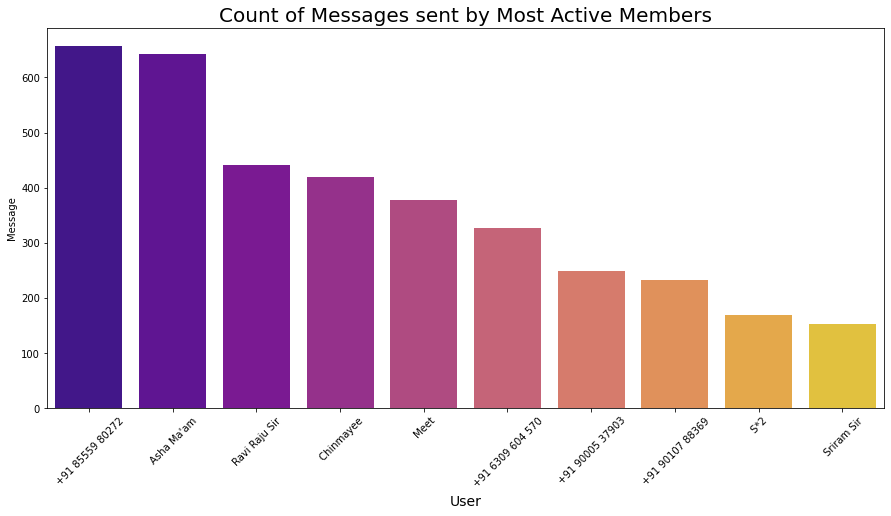

In [40]:
## countplot

dummy = pd.DataFrame(message_map.items(),columns=['User','Message']).head(10)
plt.figure(figsize=(15,7))
sn.barplot(data=dummy,x = 'User',y = 'Message',palette='plasma')
plt.xticks(rotation = 45)
plt.xlabel('User',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Count of Messages sent by Most Active Members',fontdict={'fontsize': 20,'fontweight': 8})

## Average Words in one Message

In [41]:
touse.shape[0],touse.columns

(6631,
 Index(['Date', 'Day', 'Time', 'Message', 'Person', 'RawData', 'Letters',
        'Words', 'MediaCount'],
       dtype='object'))

Text(0.5, 1.0, 'Average Words per message ')

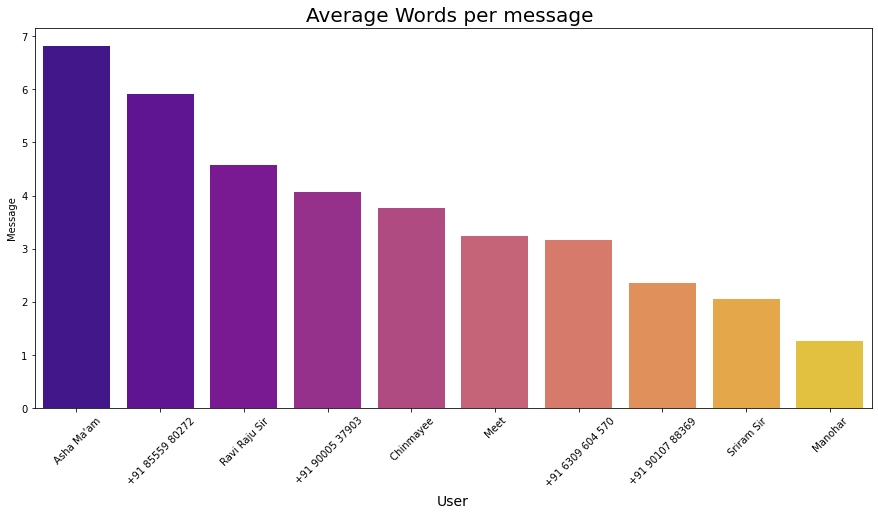

In [42]:
user_list = list(touse['Person'])
user_map = {}
for user in user_list:
    dummydf = touse[touse['Person']==user]
    msgcount = np.sum(dummydf['Words'])/touse.shape[0]
    user_map[user] = msgcount
    
user_map = dict(sorted(user_map.items(),key=lambda x:x[1],reverse=True))

dummy = pd.DataFrame(user_map.items(),columns=['User','Message']).head(10)
dummy['Message'] = dummy['Message'].apply(lambda x:x*10)
plt.figure(figsize=(15,7))
sn.barplot(data=dummy,x = 'User',y = 'Message',palette='plasma')
plt.xticks(rotation = 45)
plt.xlabel('User',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Average Words per message ',fontdict={'fontsize': 20,'fontweight': 8})

**Thing to note that the dataframe is made in sorted order only,so the people which are texting more are infact the most Active Persons of the Group!**

## Messages Sent on Each Day Per Week

Text(0.5, 1.0, 'Message sent each day per week')

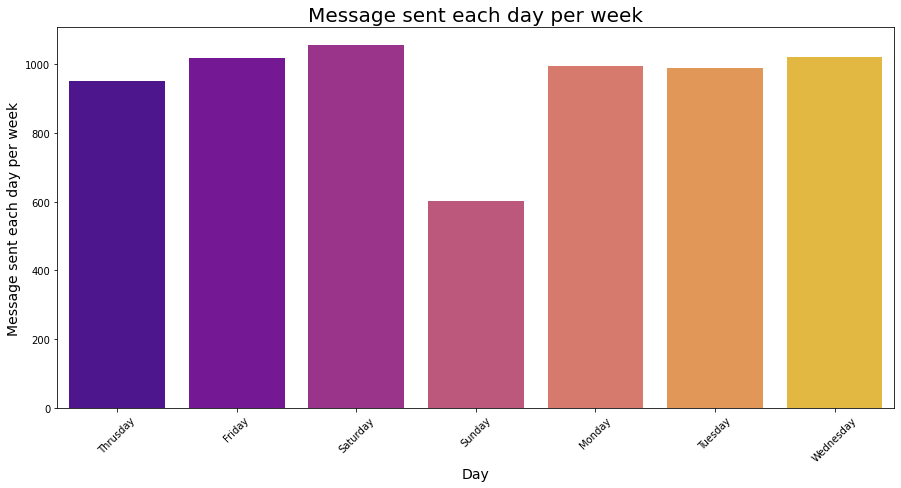

In [43]:
days = list(touse['Day'].unique())
weekmap = {}
for day in days:
    
    dummydf = touse[touse['Day']==day]
    weekmap[day] = dummydf['Day'].value_counts()[0]
    
dummy = pd.DataFrame(weekmap.items(),columns=['Day','MessageCount'])
plt.figure(figsize=(15,7))
sn.barplot(data=dummy,x = 'Day',y = 'MessageCount',palette='plasma')
plt.xticks(rotation = 45)
plt.xlabel('Day',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('Message sent each day per week',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Message sent each day per week',fontdict={'fontsize': 20,'fontweight': 8})

# Top Media Contributors

Text(0.5, 1.0, 'Top 10 Media Contributors ')

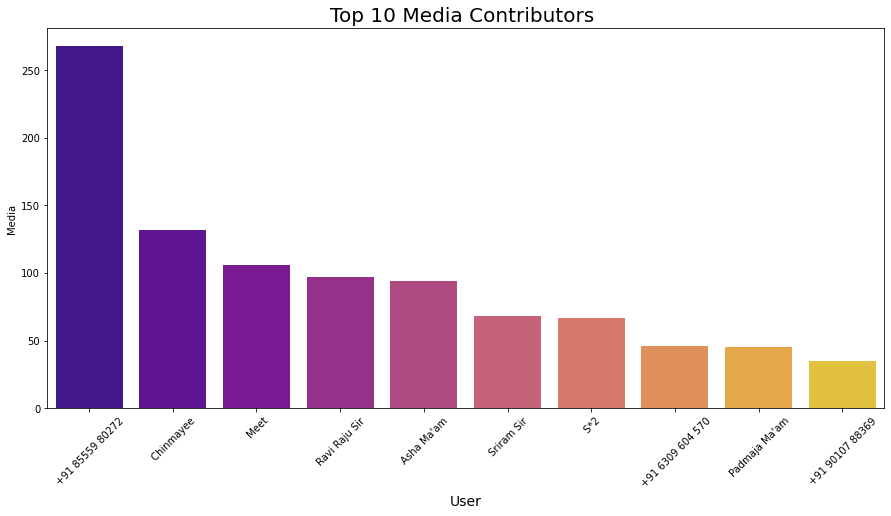

In [44]:
userlist = list(df['Person'])
media = {}

for user in userlist:
    
    dummy = touse[touse['Person']==user]
    media[user] = np.sum(dummy['MediaCount'])
    
media = dict(sorted(media.items(),key = lambda x:x[1],reverse=True))
dummy = pd.DataFrame(media.items(),columns=['User','Media']).head(10)
plt.figure(figsize=(15,7))
sn.barplot(data=dummy,x = 'User',y = 'Media',palette='plasma')
plt.xticks(rotation = 45)
plt.xlabel('User',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Top 10 Media Contributors ',fontdict={'fontsize': 20,'fontweight': 8})

# Time when the Group was highly Active

Text(0.5, 1.0, 'Time when the Group was Highly Active')

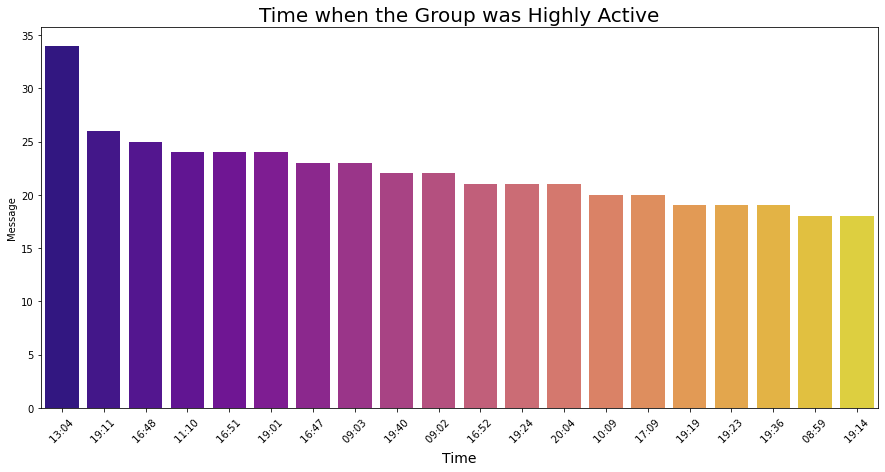

In [45]:
timelist = list(touse['Time'])
time_map = {}
for time in timelist:
    dummy = touse[touse['Time']==time]
    time_map[time] = dummy.shape[0]
    
time_map = dict(sorted(time_map.items(),key=lambda x:x[1],reverse=True))
dummy = pd.DataFrame(time_map.items(),columns=['Time','Message']).head(20)
plt.figure(figsize=(15,7))
sn.barplot(data=dummy,x = 'Time',y = 'Message',palette='plasma')
plt.xticks(rotation = 45)
plt.xlabel('Time',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Time when the Group was Highly Active',fontdict={'fontsize': 20,'fontweight': 8})

# Date when the Group was most Active

In [46]:
pd.DataFrame(touse['Date'].value_counts()).head(10)

,Date
2018-08-17,100
2021-04-20,99
2020-08-12,92
2021-06-23,89
2021-03-04,87
2020-12-12,81
2018-08-18,80
2021-05-06,79
2021-04-26,77
2020-08-05,77


Text(0.5, 1.0, 'Date when the Group was Highly Active')

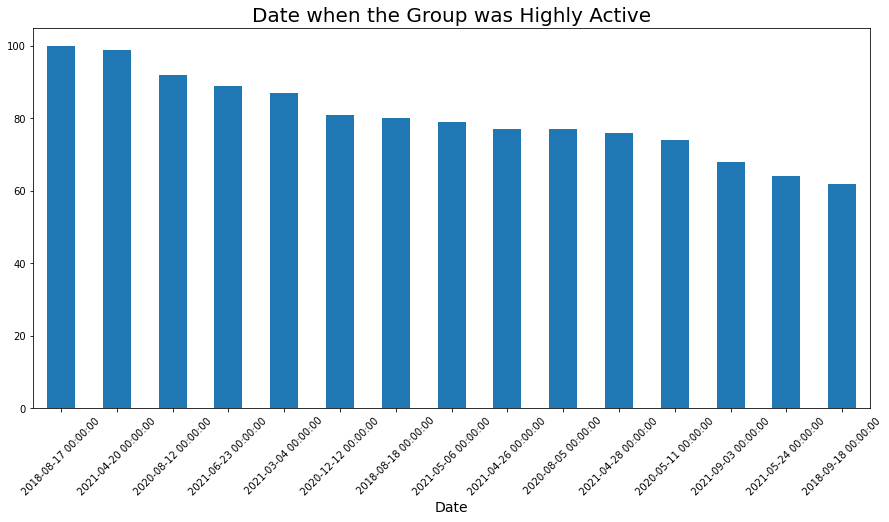

In [47]:
touse['Date'].value_counts().head(15).plot.bar(figsize = (15,7))
plt.xticks(rotation = 45)
plt.xlabel('Date',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Date when the Group was Highly Active',fontdict={'fontsize': 20,'fontweight': 8})

In [48]:
touse['Year'] = touse['Date'].dt.year
touse['Mon'] = touse['Date'].dt.month
months = {
     1 : 'Jan',
     2 : 'Feb',
     3 : 'Mar',
     4 : 'Apr',
     5 : 'May',
     6 : 'Jun',
     7 : 'Jul',
     8 : 'Aug',
     9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}
touse['Month'] = touse['Mon'].map(months)
touse.drop('Mon',axis=1,inplace=True)

In [49]:
touse.head(10)

,Date,Day,Time,Message,Person,RawData,Letters,Words,MediaCount,Year,Month
2,2018-08-16,Thrusday,20:12,Hello this is official grup,Chinmayee,"16/08/18, 20:12 - Chinmayee: Hello this is off...",28,6,0,2018,Aug
3,2018-08-16,Thrusday,20:12,Chusinam leaaa,Jagas,"16/08/18, 20:12 - Jagas: Chusinam leaaa",15,3,0,2018,Aug
4,2018-08-16,Thrusday,20:12,Admin cheyyi,+91 6309 604 570,"16/08/18, 20:12 - +91 6309 604 570: Admin cheyyi",13,3,0,2018,Aug
5,2018-08-16,Thrusday,20:12,First,+91 6309 604 570,"16/08/18, 20:12 - +91 6309 604 570: First",6,2,0,2018,Aug
6,2018-08-16,Thrusday,20:12,Kkkk,Kalyan,"16/08/18, 20:12 - Kalyan: Kkkk",5,2,0,2018,Aug
7,2018-08-16,Thrusday,20:12,No msg anything except studies,Chinmayee,"16/08/18, 20:12 - Chinmayee: No msg anything e...",31,6,0,2018,Aug
8,2018-08-16,Thrusday,20:12,Hello sirs kuda unarru,Chinmayee,"16/08/18, 20:12 - Chinmayee: Hello sirs kuda u...",23,5,0,2018,Aug
9,2018-08-16,Thrusday,20:12,Chusi matladu,Chinmayee,"16/08/18, 20:12 - Chinmayee: Chusi matladu",14,3,0,2018,Aug
11,2018-08-16,Thrusday,20:13,Adhea kadha cheppindhiii,Jagas,"16/08/18, 20:13 - Jagas: Adhea kadha cheppindhiii",25,4,0,2018,Aug
13,2018-08-16,Thrusday,20:33,Nc job,Meet,"16/08/18, 20:33 - Meet: Nc job",7,3,0,2018,Aug


# Most Active Month and Most Active Year

In [50]:
touse['Year'].unique()

array([2018, 2019, 2020, 2021], dtype=int64)

<AxesSubplot:ylabel='Month'>

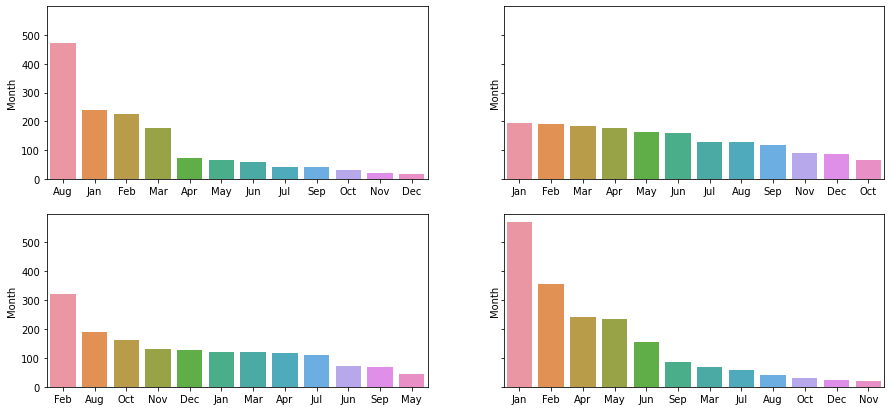

In [51]:
def getyeardf(year):
    return touse[touse['Year']==year]

df_2018 = getyeardf(2018)
df_2019 = getyeardf(2019)
df_2020 = getyeardf(2020)
df_2021 = getyeardf(2021)

fig,axes = plt.subplots(2,2,figsize = (15,7),sharey=True)

sn.barplot(data = df_2018,ax = axes[0,0],x = df_2018['Month'].unique(),y = df_2018['Month'].value_counts())

sn.barplot(data = df_2019,ax = axes[0,1],x = df_2019['Month'].unique(),y = df_2019['Month'].value_counts())

sn.barplot(data = df_2020,ax = axes[1,0],x = df_2020['Month'].unique(),y = df_2020['Month'].value_counts())

sn.barplot(data = df_2021,ax = axes[1,1],x = df_2021['Month'].unique(),y = df_2021['Month'].value_counts())


In [54]:
dict(df_2018['Month'].value_counts())

{'Aug': 470,
 'Sep': 238,
 'Nov': 227,
 'Oct': 179,
 'Dec': 73,
 'Mar': 65,
 'Apr': 60,
 'Jan': 43,
 'Jul': 42,
 'Feb': 33,
 'May': 23,
 'Jun': 18}

In [55]:
dict(df_2021['Month'].value_counts())

{'Apr': 570,
 'May': 357,
 'Jun': 243,
 'Mar': 234,
 'Jan': 154,
 'Sep': 85,
 'Jul': 70,
 'Feb': 57,
 'Oct': 41,
 'Aug': 31,
 'Nov': 24,
 'Dec': 19}

In [56]:
list(dict(df_2021['Month'].value_counts()).keys())

['Apr',
 'May',
 'Jun',
 'Mar',
 'Jan',
 'Sep',
 'Jul',
 'Feb',
 'Oct',
 'Aug',
 'Nov',
 'Dec']

In [ ]:
touse_month = ['Apr',
 'May',
 'Jun',
 'Mar',
 'Jan',
 'Jul',
 'Feb']


# Wordcloud

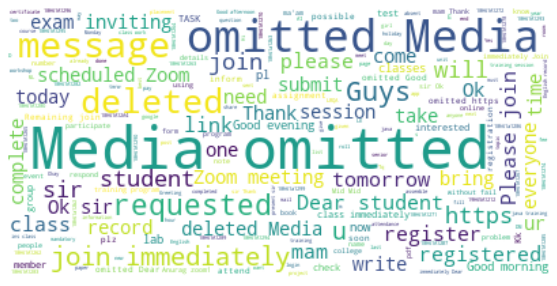

In [52]:
text = " ".join(msg for msg in touse['Message'])
wordcloud = WordCloud(stopwords=STOPWORDS,background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()